# Concrete Strength Prediction
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

#### Attribute Information:
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

###### Name -- Data Type -- Measurement -- Description
- Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age(age) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

## Exploratory data quality report

#### Univariate analysis: data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates (10 Marks)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [256]:
# Importing basic python libraries

import numpy as np                 
import pandas as pd 
import matplotlib.pyplot as plt    
import seaborn as sns 
%matplotlib inline

# Import Linear Regression machine learning library
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

             
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
from os import system
from sklearn import model_selection

# Model Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [6]:
# Reading data from CSV file into pandas dataframe

df = pd.read_csv("concrete.csv") 

In [7]:
# Display the data upto 10 rows

df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [8]:
# Checking the no. of rows and columns in the data set
df.shape

(1030, 9)

In [9]:
# Displaying and checking datatypes of all the 9 columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
# The datatype for all the columns including the Target column "strenght" is float or integer so we need not convert any data types

In [11]:
# Display the Statistical Summary of the data.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [12]:
df.mean()

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64

In [13]:
df.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [14]:
# There are no missing variables here.  

In [15]:
# Cheking for any null values in the data set.
df.isnull().values.any()

# Since there is no null values so not removing any null from the data set.

False

In [16]:
df.nunique()

# This gives the no. of unique values for each column. For example in strength there are 845 unique values.
# Similar analysis can be done for the rest of the columns with their no. of unique values.

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

#### Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

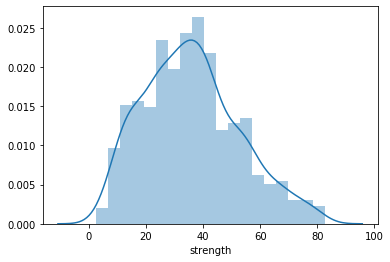

In [17]:
# We can take a look at distribution based on the value in balance column
sns.distplot(df['strength'])

In [18]:
# Correlation matrix 
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [19]:
# Heatmap for Correlation between columns having int data types
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

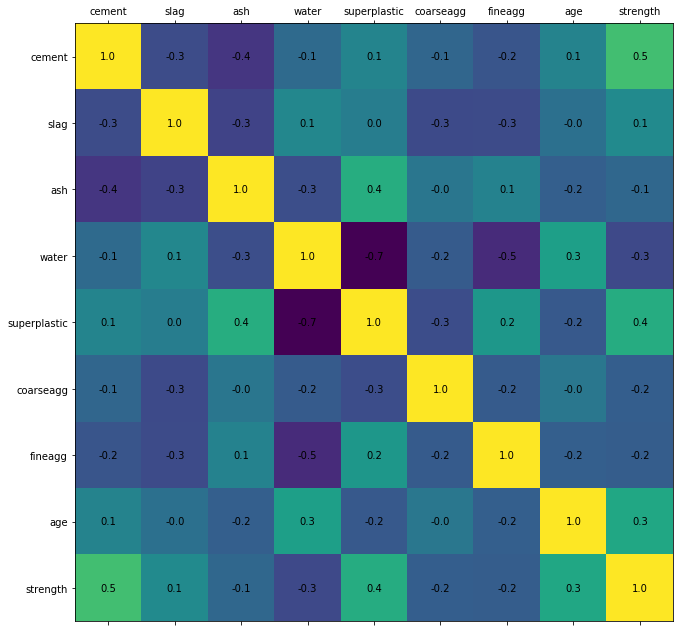

In [20]:
plot_corr(df)

# The plot with yellow colour represents maximum correlation and purple colour represents minimum correlation. 

Text(0.7, 107.5, 'IQR')

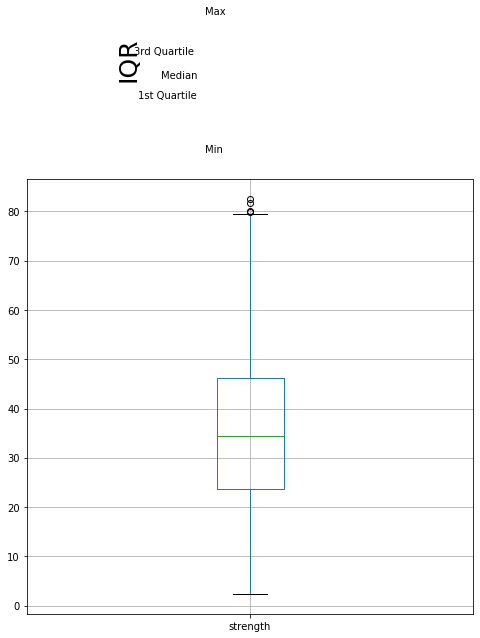

In [21]:
df.boxplot(column="strength",return_type='axes',figsize=(8,8))

# Create text
plt.text(x=0.74, y=112.00, s="3rd Quartile")
plt.text(x=0.8, y=107.00, s="Median")
plt.text(x=0.75, y=103.00, s="1st Quartile")
plt.text(x=0.9, y=92.00, s="Min")
plt.text(x=0.9, y=120.00, s="Max")
plt.text(x=0.7, y=107.5, s="IQR", rotation=90, size=25)

# We have outliers in strength of concerte if the strength is more than 78.

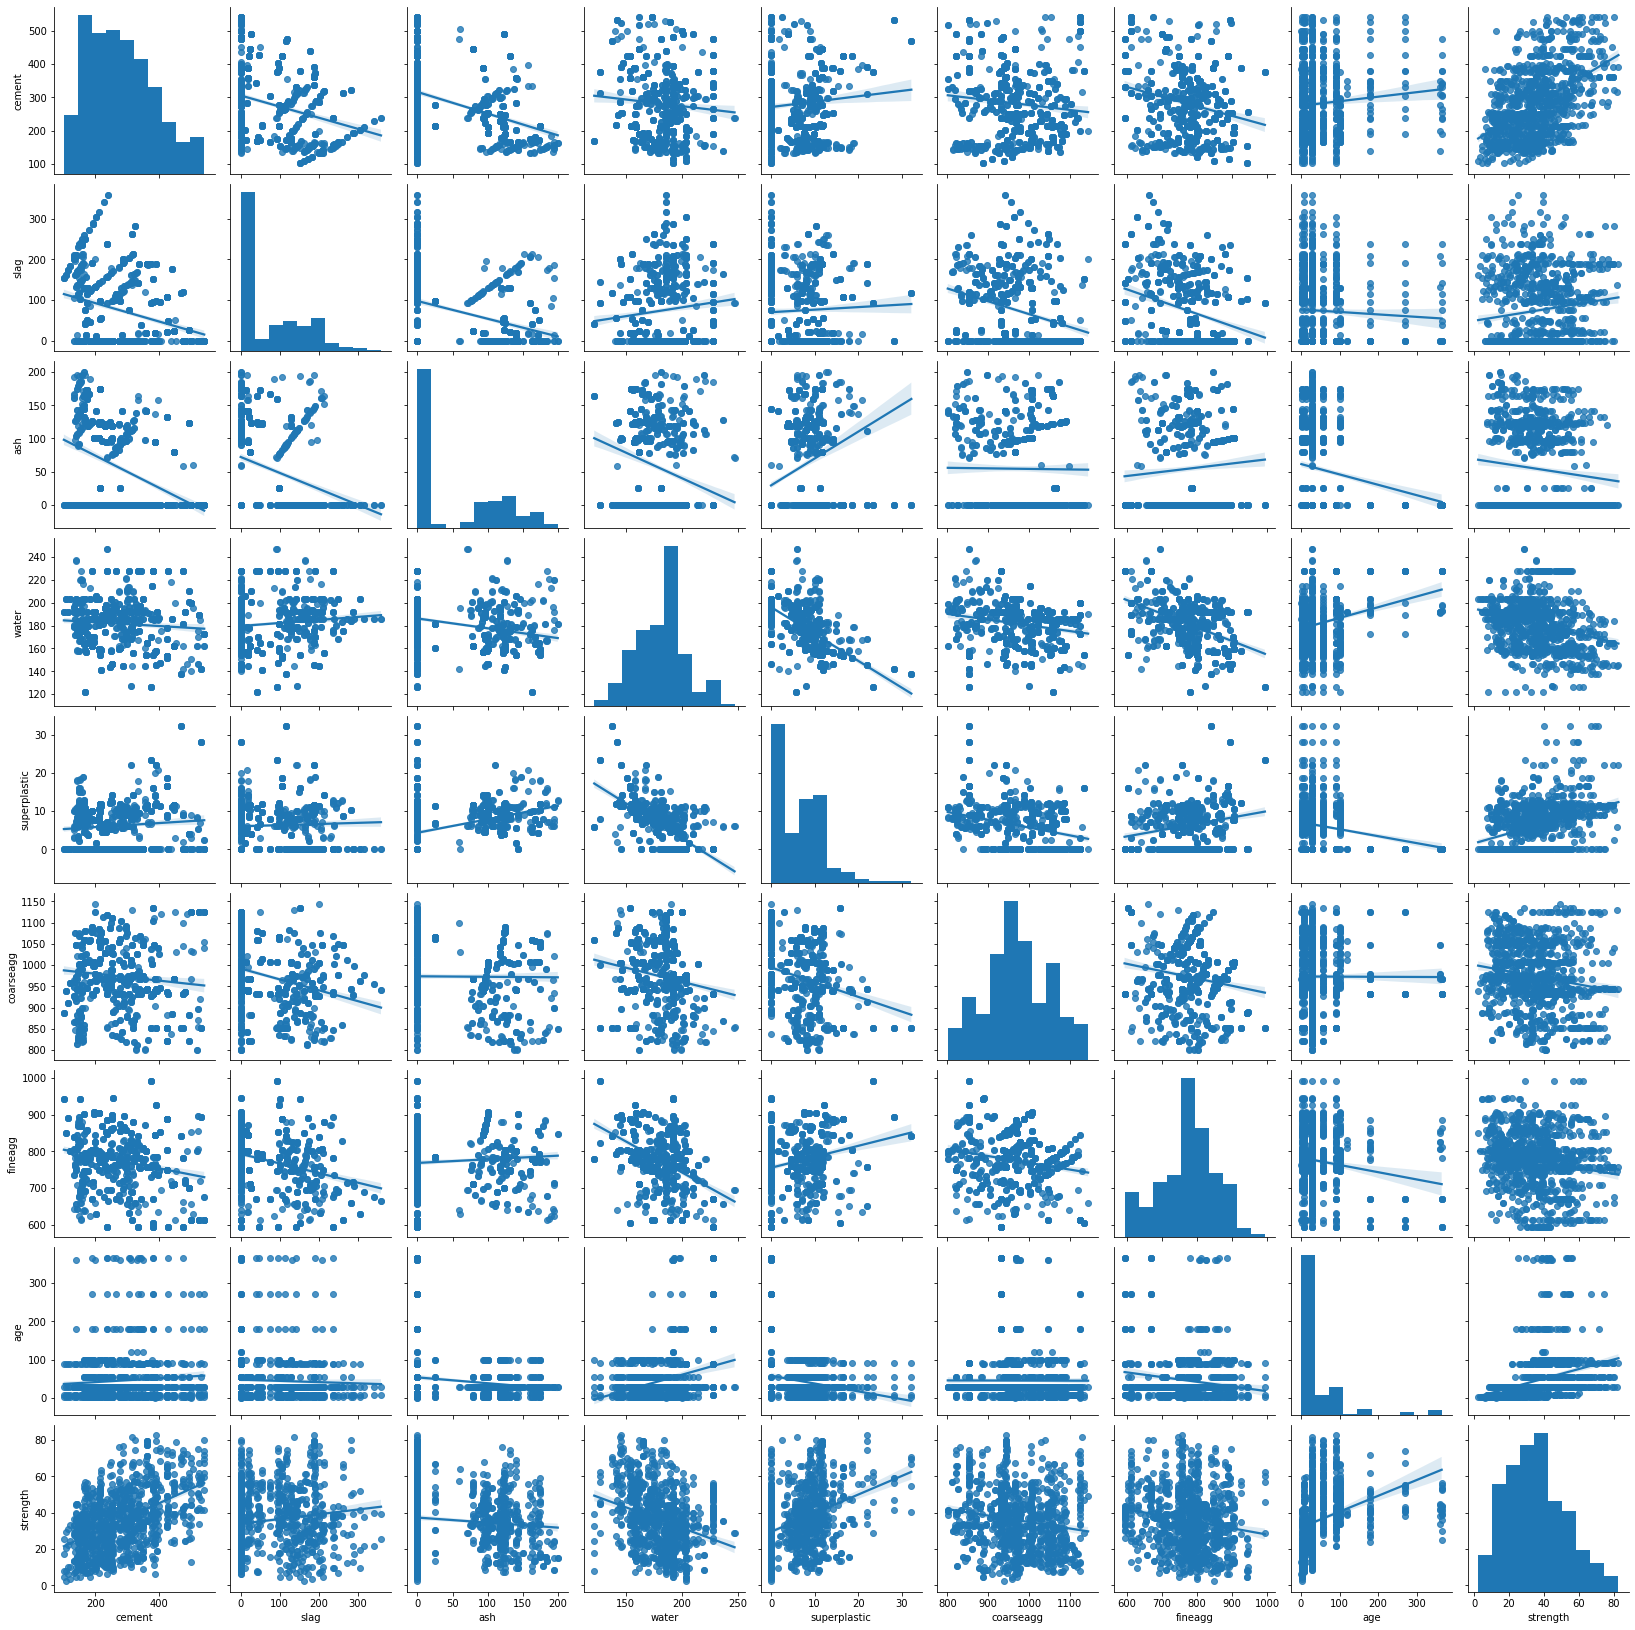

In [64]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension

sns.pairplot(df, kind="reg")
plt.show()

In [23]:
# data for all the attributes are skewed, especially for the variable "superplastic"

#The mean for superplastic is 6 which clearly indicates majority concentration on the left.

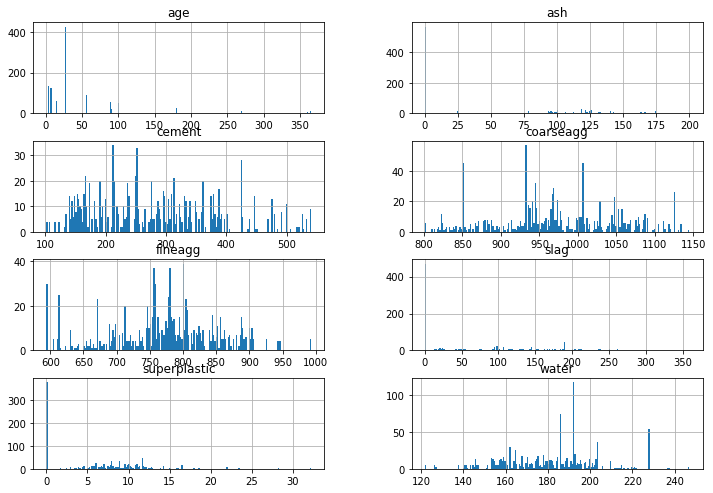

In [24]:
# Histogram 
columns = list(df)[0:-1] 
df[columns].hist(stacked=False, bins=200, figsize=(12,30), layout=(14,2));

# For most of the variables the Skewness is on the right.

### Feature Engineering techniques (10 marks)
- Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
- Get data model ready and do a train test split.
- Check for higher degree attributes, should it be linear, quadratic or higher degree? Use Polynomial Features (Consider degree 2 and 3).

In [152]:
# We will use 70% of data for training and 30% for testing.
df_cols = ['age','cement','fineagg','superplastic','ash','coarseagg','slag','water']
x = df[df_cols]
y = df.strength

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [179]:
# Using Polynomial Features with degree 3
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures( degree = 3, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
xPoly_train[0:2]

array([[1.40000000e+01, 3.50000000e+02, 7.75000000e+02, 0.00000000e+00,
        0.00000000e+00, 9.74000000e+02, 0.00000000e+00, 2.03000000e+02,
        1.96000000e+02, 4.90000000e+03, 1.08500000e+04, 0.00000000e+00,
        0.00000000e+00, 1.36360000e+04, 0.00000000e+00, 2.84200000e+03,
        1.22500000e+05, 2.71250000e+05, 0.00000000e+00, 0.00000000e+00,
        3.40900000e+05, 0.00000000e+00, 7.10500000e+04, 6.00625000e+05,
        0.00000000e+00, 0.00000000e+00, 7.54850000e+05, 0.00000000e+00,
        1.57325000e+05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.48676000e+05, 0.00000000e+00,
        1.97722000e+05, 0.00000000e+00, 0.00000000e+00, 4.12090000e+04,
        2.74400000e+03, 6.86000000e+04, 1.51900000e+05, 0.00000000e+00,
        0.00000000e+00, 1.90904000e+05, 0.00000000e+00, 3.97880000e+04,
        1.71500000e+06, 3.79750000e+06, 0.00000000e+00, 0.000000

In [180]:
x_train.head(5)

,age,cement,fineagg,superplastic,ash,coarseagg,slag,water
185,14,350.0,775.0,0.0,0.0,974.0,0.0,203.0
286,91,374.0,756.7,10.1,0.0,926.1,189.2,170.1
600,3,277.0,856.0,0.0,0.0,968.0,0.0,191.0
691,7,380.0,594.0,0.0,0.0,932.0,95.0,228.0
474,28,356.0,778.0,11.0,142.0,801.0,0.0,193.0


In [185]:
# Creating regression model for Polynomial Feature

regression_modelP = regression_model.fit(xPoly_train, y_train)

In [186]:
# Looking at Training data for R^2
print(regression_modelP.score(xPoly_train, y_train))

0.9311497733563961


In [207]:
poly = PolynomialFeatures( degree = 3, include_bias = False) 
xPoly_train = poly.fit_transform(x_train)
regression_modelPnew = regression_model.fit(xPoly_train, y_train)

# Train R^2
print(regression_modelPnew.score(xPoly_train, y_train))

0.9311497733563961


In [189]:
# With  Polynomial feature the training data is 93% 

In [190]:
# Apply Feature selection method to find which features fits well and do the plotting

In [102]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [104]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (721, 8) (721,)
Testing dataset shape: (309, 8) (309,)


In [105]:
x.shape

(1030, 8)

In [106]:
# Building Linear Regression to use in feature selection
lr = LinearRegression()

In [112]:
# Building step forward feature selection
sfs1 = sfs(lr, k_features=8, forward=True, scoring='r2', cv=5)

In [113]:
sfs1 = sfs1.fit(x_train.values, y_train.values)

In [114]:
sfs1.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.24694817, 0.22856441, 0.27317071, 0.29434551, 0.25412144]),
  'avg_score': 0.2594300484486841,
  'feature_names': ('1',),
  'ci_bound': 0.02899498425686779,
  'std_dev': 0.022559082806756295,
  'std_err': 0.011279541403378146},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([0.35522639, 0.35333694, 0.33790701, 0.39833764, 0.35842885]),
  'avg_score': 0.3606473665240385,
  'feature_names': ('1', '3'),
  'ci_bound': 0.025868738693255115,
  'std_dev': 0.02012675754942879,
  'std_err': 0.010063378774714395},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.48252748, 0.44512459, 0.48300176, 0.46623363, 0.48672252]),
  'avg_score': 0.47272199567389406,
  'feature_names': ('0', '1', '3'),
  'ci_bound': 0.0199245106208377,
  'std_dev': 0.015501946164123499,
  'std_err': 0.007750973082061749},
 4: {'feature_idx': (0, 1, 3, 6),
  'cv_scores': array([0.56185255, 0.51839926, 0.5028864 , 0.558415  , 0.55966515]),
  'avg_score': 0.54024367074

In [115]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

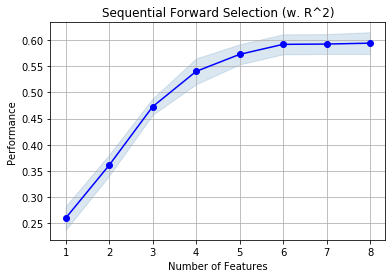

In [116]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [117]:
# Build full model on all the features, for comparison

linR = LinearRegression()
linR.fit(x_train, y_train)

LinearRegression()

In [118]:
y_train_pred = linR.predict(x_train)
print('Training accuracy on selected features: %.3f' % linR.score(x_train, y_train))

Training accuracy on selected features: 0.603


In [119]:
y_test_pred = linR.predict(x_test)
print('Testing accuracy on selected features: %.3f' % linR.score(x_test, y_test))

Testing accuracy on selected features: 0.634


In [170]:
x_train.dtypes

age               int64
cement          float64
fineagg         float64
superplastic    float64
ash             float64
coarseagg       float64
slag            float64
water           float64
dtype: object

In [171]:
# Convert Target variable into numerical
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
y = le.fit_transform(y)

le.transform(y)

array([333, 215, 320, ..., 601, 721, 696], dtype=int64)

## Creating the model and tuning it

#### Algorithms that you think will be suitable for this project. Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms has to be there). (15 marks)

In [251]:
# Building Model R^2
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [253]:
# Scoring the Regression Model

print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

# Training data with R^2 is 60%

0.6031487540630229
0.6339136715208274


In [254]:
# Training data with Regression is 60% while Testing Data is 63% (approx.)

In [238]:
# Building Model - Mean Square Error for both train and test set.

from sklearn.metrics import mean_squared_error
from math import sqrt

In [173]:
# Train MSE
predictedstrength = regression_model.predict(x_train)
print(mean_squared_error(predictedstrength, y_train))

108.56154351227964


In [174]:
# Test MSE
predictedstrength = regression_model.predict(x_test)
print(mean_squared_error(predictedstrength, y_test))

106.5456035985051


In [239]:
# Building Model - Decision Tree

from sklearn.tree import DecisionTreeRegressor

dTree = DecisionTreeRegressor(random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [205]:
# Scoring the Decision tree

print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

0.9948592423407845
0.8698250350201218


In [229]:
# Training data with Decision tree is 99% while Testing Data is 87% (approx.)

In [214]:
# Building Model - Bagging 

from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

barg = BaggingRegressor(DecisionTreeRegressor(),n_jobs=3,random_state=0)
barg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_jobs=3,
                 random_state=0)

In [215]:
# Scoring the Bagging

print(barg.score(x_train, y_train))
print(barg.score(x_test, y_test))

0.9754668061395719
0.890820624425275


In [280]:
# Training data with Bagging is 98% (approx.) while Testing Data is 89% (approx.)

In [224]:
# Building Model - Boosting

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [219]:
# Scoring the Boosting

print(gbr.score(x_train, y_train))
print(gbr.score(x_test, y_test))

0.9503239654196514
0.9035338987380778


In [221]:
# Training data with Boosting is 95% while Testing Data is 90%

In [226]:
# Building Model - Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [227]:
# Scoring the Random Forest

print(rfr.score(x_train, y_train))
print(rfr.score(x_test, y_test))

0.5732284206997555
0.5201580718987704


In [228]:
# Training data with Random Forest is 57% while Testing Data is 52%

In [245]:
# Creating a regularized RIDGE model and note the coefficients

ridge = Ridge(alpha=.3)
ridge.fit(x_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.11043496  0.12655756  0.0361927   0.37611194  0.09070532  0.0240282
  0.10882838 -0.10315964]


In [246]:
# Scoring the Ridge Model

print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.6031487540568202
0.6339139078395872


In [ ]:
# Training data with Ridge is 60% while Testing Data is 63%. Here testing data is better than training data.

In [244]:
# Creating a regularized LASSO model and note the coefficients

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.11038258  0.12642427  0.03593848  0.36977517  0.09060081  0.02367754
  0.1086403  -0.10474063]


In [247]:
# Scoring the Lasso Model

print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.6031466120213622
0.6340483868471128


In [248]:
# Training data with Lasso is 60% while Testing Data is 63%. Here again testing data is better than training data.

In [271]:
# Model Tuning using K-Fold Cross Validation for all the models above.

num_folds = 50
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)

In [272]:
# Liner Regression
score1 = cross_val_score(regression_model, x, y, cv=kfold).mean()
print(f'Cross validation score for Linear Regression = {score1}')

Cross validation score for Linear Regression = 0.5340547187441113


In [273]:
# Decision Tree
score2 = cross_val_score(dTree, x, y, cv=kfold).mean()
print(f'Cross validation score for Decision Tree = {score2}')

Cross validation score for Decision Tree = 0.8418465784296003


In [274]:
# Bagging
score3 = cross_val_score(barg, x, y, cv=kfold).mean()
print(f'Cross validation score for Bagging = {score3}')

Cross validation score for Bagging = 0.8983210564048493


In [276]:
# Gradient Boosting
score4 = cross_val_score(gbr, x, y, cv=kfold).mean()
print(f'Cross validation score for Gradient Boosting = {score4}')

Cross validation score for Gradient Boosting = 0.8910604907859765


In [277]:
# Random Forest
score5 = cross_val_score(rfr, x, y, cv=kfold).mean()
print(f'Cross validation score for Random Forest = {score5}')

Cross validation score for Random Forest = 0.5003639971208909


In [278]:
# Ridge
score6 = cross_val_score(ridge, x, y, cv=kfold).mean()
print(f'Cross validation score for Ridge = {score6}')

Cross validation score for Ridge = 0.5340547195878866


In [279]:
# Lasso
score7 = cross_val_score(lasso, x, y, cv=kfold).mean()
print(f'Cross validation score for Lasso = {score7}')

Cross validation score for Lasso = 0.5340534616583884


In [ ]:
# The best models from the above evaluations are bagging anf bossting with 90% and 89%.

#### Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [286]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [311]:
# specify parameters and distributions to sample from
param = {'max_depth': [10,20,30,40,50],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [1,2,4,8],
              'bootstrap': [True],
              'n_estimators':[50]}

In [314]:
# run grid search for Bagging
clfbag = GridSearchCV(BaggingRegressor(), param, cv = 5, verbose = 2, n_jobs = -1 ) 

In [315]:
clfbag.fit(x, y)
clfbag.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter max_depth for estimator BaggingRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [319]:
# run grid search for Gradient Boosting
clfgb = GridSearchCV(GradientBoostingRegressor(), param, cv = 5, verbose = 2, n_jobs = -1 ) 

In [321]:
clfgb.fit(x, y)
clfgb.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter bootstrap for estimator GradientBoostingRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [329]:
# Creating a Dataframe for comparing the models

data= {'Technique' : ['Linear Regression R^2', 'Decision Tree', 'Bagging','Gradient Boosting', 'Random Forest', 
                     'Ridge', 'Lasso'],
      'Score' :[score1, score2, score3, score4, score5, score6, score7]
     }

result = pd.DataFrame(data)

In [331]:
result

,Technique,Score
0,Linear Regression R^2,0.534055
1,Decision Tree,0.841847
2,Bagging,0.898321
3,Gradient Boosting,0.891060
4,Random Forest,0.500364
5,Ridge,0.534055
6,Lasso,0.534053


In [332]:
# The best model here is Bagging with a score of 90% (approx.)